1. 均方误差（MSE）- L2loss：用于回归问题，计算预测值与真实值之间的平方差的平均值。MSE对较大的误差更加敏感，因此适合于需要惩罚大误差的场景。
2. 平均绝对误差（MAE） - L1 loss：同样用于回归问题，计算预测值与真实值之间的绝对差的平均值。MAE对异常值的敏感性较低，适合于对所有误差一视同仁的情况。
3. Huber损失：结合了MSE和MAE的优点，当误差小于某个阈值时使用MSE，超过该阈值时使用MAE。这使得Huber损失在处理异常值时更加灵活。
4. 余弦损失：用于向量比较，计算真实值与预测值之间的余弦相似度损失。适合于文本分类和推荐系统等需要比较向量相似度的场景。

【深度学习】Huber Loss详解 https://blog.csdn.net/qq_42761751/article/details/145210644
https://pytorch.org/docs/stable/generated/torch.nn.HuberLoss.html

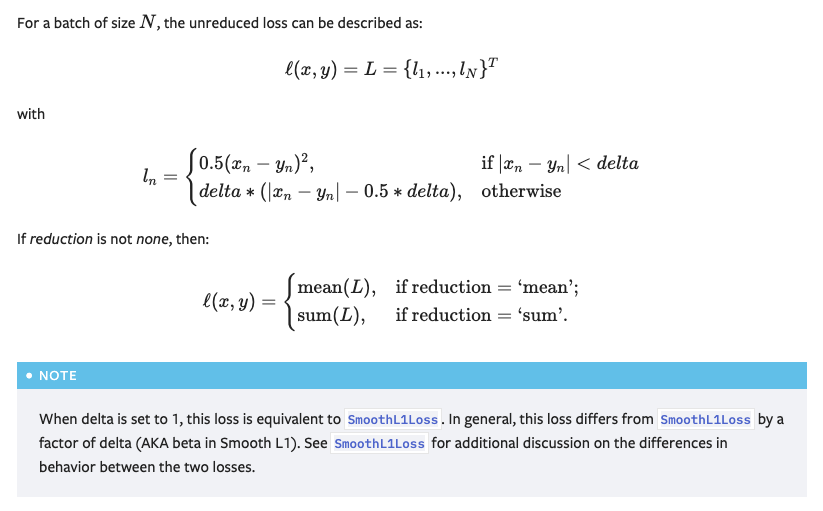

计算向量的余弦相似度

cosine 返回的是距离而非相似度，因此需要取反

cosine_similarity = 1 - cosine_distance   将距离转换为相似度（通常的做法）
Python计算余弦相似性（cosine similarity）方法汇总 - https://zhuanlan.zhihu.com/p/508625294

In [2]:
## ML5 牛客, 实际huber loss公式还需要乘delta
import numpy as np
def calculate_loss(real_values, predicted_values,delta):
    error = real_values - predicted_values
    mse = np.mean(error**2)
    mae = np.mean(np.abs(error))
    huber_loss = [mse if np.abs(e)<=delta else mae for e in error ]
    cosine_loss = 1-np.dot(real_values,predicted_values) / (np.linalg.norm(real_values) * np.linalg.norm(predicted_values))
    # print(error,huber_loss)
    return round(mse, 6), round(mae, 6), round(np.mean(huber_loss), 6), round(cosine_loss, 6)
    
    

# 从标准输入读取数据
n = 6
results = [[400.13334197575455, 415.02721871414985],
[687.2053458075301, 688.3979024507972],
[669.1075413706716, 633.0309221426394],
[493.4466258517276, 536.0263490616016],
[730.2711663241887, 728.9471236043929],
[434.3319648437725, 401.8774016025876]]

real_values = []
predicted_values = []

for ii in range(n):
    real, predicted = map(float, results[ii])
    real_values.append(real)
    predicted_values.append(predicted)

delta = 19.718972980653863  # 阈值

# 调用计算损失函数的函数
results = calculate_loss(np.array(real_values), np.array(predicted_values), delta)
# 输出结果
for value in results:
    print(f"{value:.6f}")





732.142801
21.420230
376.781515
0.001068
